In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Customer Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

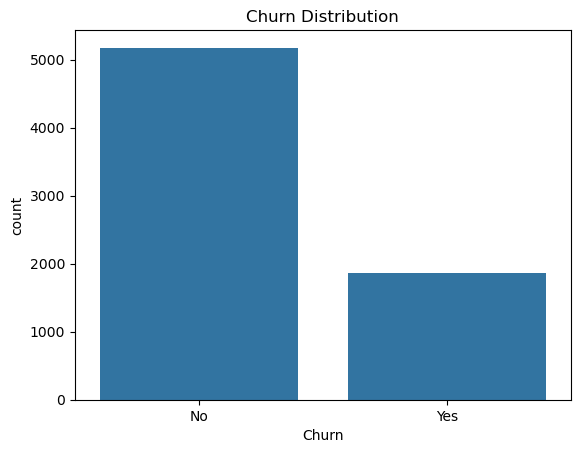

In [42]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

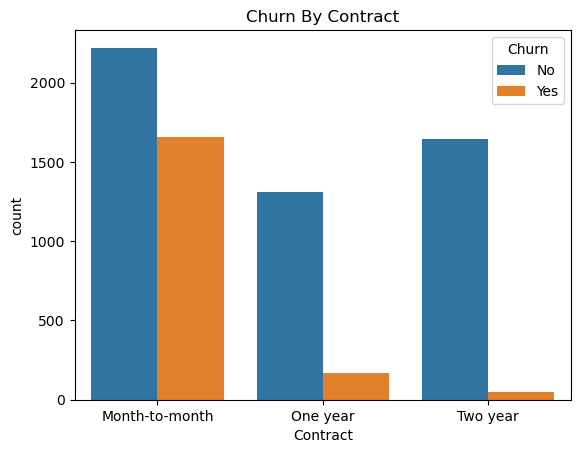

In [43]:
sns.countplot(x='Contract', data=df, hue='Churn')
plt.title('Churn By Contract')
plt.legend(title='Churn')
plt.show()

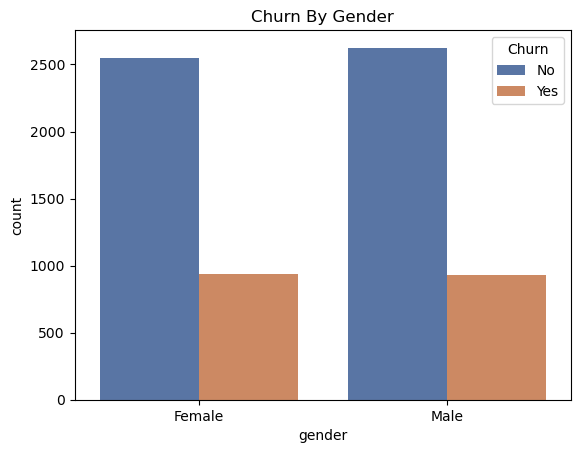

In [44]:
sns.countplot(x='gender', data=df, hue='Churn', palette='deep')
plt.title('Churn By Gender')
plt.legend(title='Churn')
plt.show()

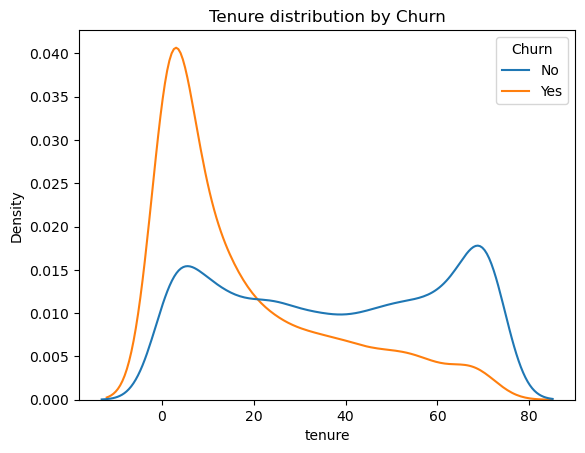

In [24]:
sns.kdeplot(data=df, x='tenure', hue='Churn', common_norm=False)
plt.title('Tenure distribution by Churn')
plt.show()

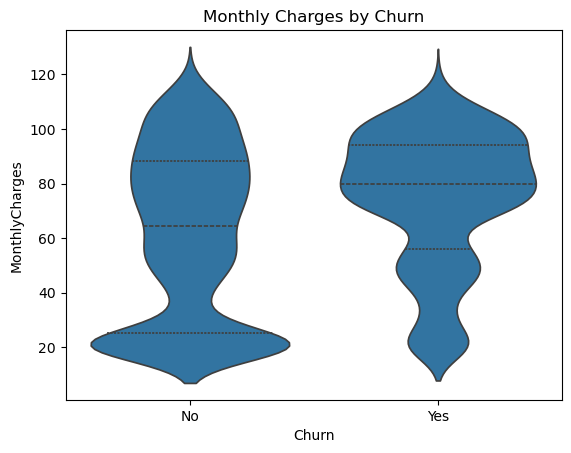

In [25]:
sns.violinplot(x='Churn', y='MonthlyCharges', data=df, inner='quartile')
plt.title('Monthly Charges by Churn')
plt.show()

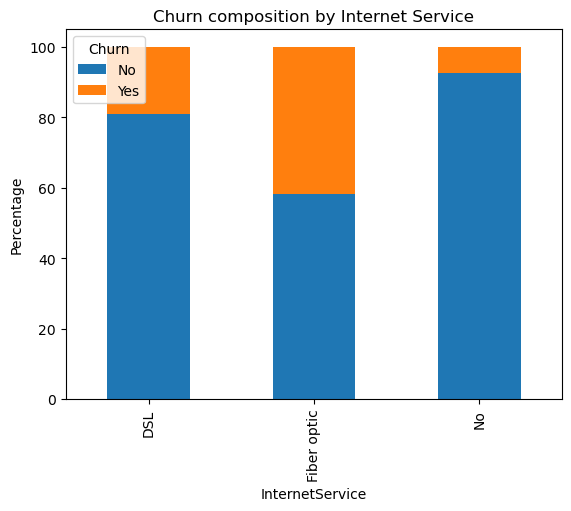

In [27]:
ct = pd.crosstab(df['InternetService'], df['Churn'], normalize='index')*100
ct.plot(kind='bar', stacked=True)
plt.ylabel('Percentage'); plt.title('Churn composition by Internet Service')
plt.show()

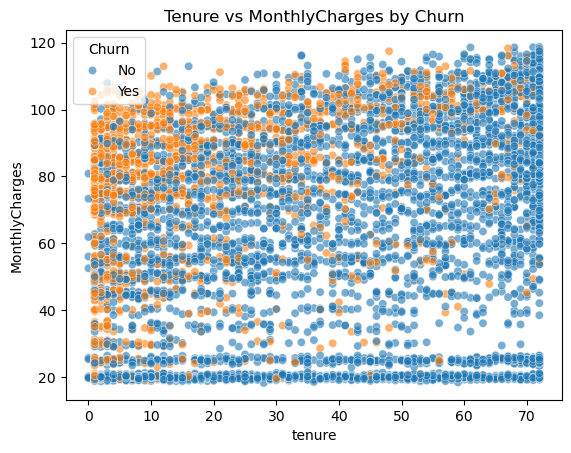

In [35]:
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', alpha=0.6)
plt.title('Tenure vs MonthlyCharges by Churn')
plt.show()

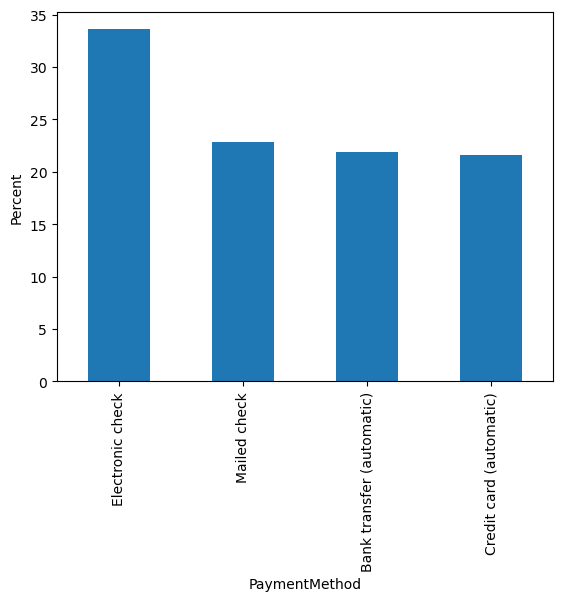

In [36]:
count = df['PaymentMethod'].value_counts(normalize=True)*100
count.plot(kind='bar'); plt.ylabel('Percent')
plt.show()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [46]:
from sklearn.preprocessing import LabelEncoder

# Copy dataset
df_encoded = df.copy()

# Label encode categorical columns
le = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Get correlation with churn
corr = df_encoded.corr()['Churn'].sort_values(ascending=False)

# Display top and bottom correlations
print(corr)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64


In [47]:
services = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df['TotalServices'] = (df[services] == 'Yes').sum(axis=1)

In [49]:
df['TotalServices'].value_counts().sort_index()

TotalServices
0      80
1    1701
2    1188
3     965
4     922
5     908
6     676
7     395
8     208
Name: count, dtype: int64

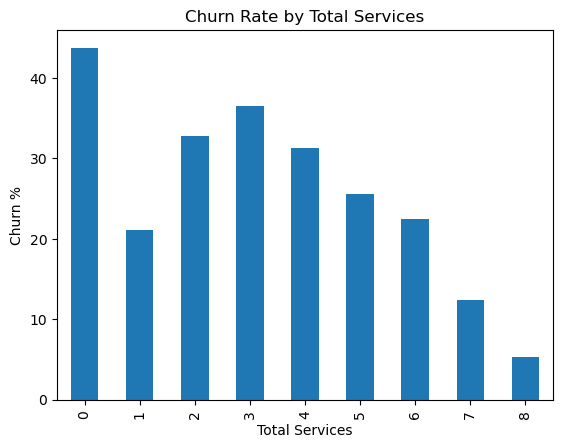

In [52]:
churn_rate = df.groupby('TotalServices')['Churn'].value_counts(normalize=True).unstack()['Yes'] * 100
churn_rate.plot(kind='bar', title='Churn Rate by Total Services', ylabel='Churn %', xlabel='Total Services')
plt.show()

In [64]:
X = df.drop('Churn', axis = 1)
y = df['Churn'].map({'Yes': 1, 'No': 0})

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

In [67]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [68]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

In [69]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_cols),                  # scale numeric features
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)  # encode categorical features
    ]
)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [71]:
log_reg = LogisticRegression()

In [72]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', log_reg)
])

In [73]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalServices'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object'))])),
                ('classifier', LogisticRegression())])

In [80]:
import joblib

In [82]:
joblib.dump(model, 'rf=model.pkl')
joblib.dump(preprocessor, 'rf=preproceesor.pkl')

['rf=preproceesor.pkl']

In [74]:
predictions = model.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [77]:
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))

Accuracy: 0.7950780880265026

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1552
           1       0.63      0.54      0.58       561

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113


Confusion Matrix:
 [[1377  175]
 [ 258  303]]


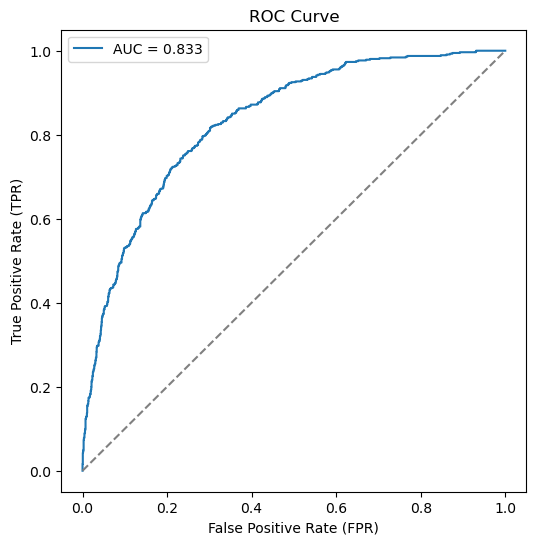

In [83]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1], [0,1], '--', color='grey')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

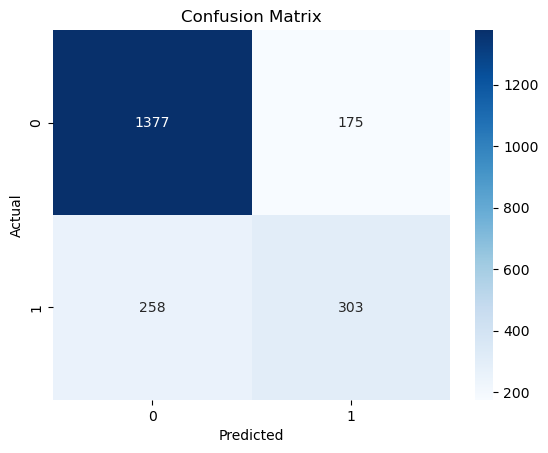

In [84]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [85]:
from sklearn.metrics import roc_auc_score
print("AUC Score:", roc_auc_score(y_test, y_pred_proba))

AUC Score: 0.8334728807174228
